In [1]:
import pandas as pd
import matplotlib
import numpy as np

In [2]:
df = pd.read_csv('train.csv',header = 0)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
total_survived_num = df['Survived'].sum()
total_dead_num = 891-total_survived_num

In [5]:
print("Survived=",total_survived_num) #How many people survived?

Survived= 342


Survival rate

In [6]:
import matplotlib.pyplot as plt

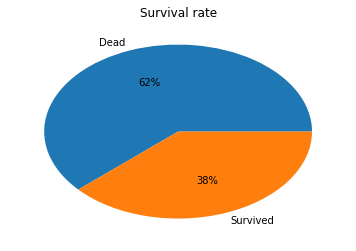

In [7]:
plt.pie([total_dead_num, total_survived_num],labels=['Dead','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 
plt.show()

Q:What can be learned about the chances of survival from a passenger's age, cabin, class or fare?
A:Since there are so many missing values of "cabin", it's better not to evaluate the chances of survival from passengers' cabin, "age","class" and "fare" will be talked about.

In [8]:
#Age
#For missing values of age, replaced NaN by random number that close to mean value(using standard deviation).
#Reference: http://shichaoji.com/2016/10/

In [9]:
average_age   = df["Age"].mean()
std_age       = df["Age"].std()
count_nan_age = df["Age"].isnull().sum()

rand_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

df["Age"][np.isnan(df["Age"])] = rand_1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
df #Now gaps are filled

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,41.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
bins = [0, 12, 65, 100]
df['Age_bracket'] = pd.cut(df['Age'], bins)
by_age = df.groupby('Age_bracket')['Survived'].mean()
by_age


Age_bracket
(0, 12]      0.579710
(12, 65]     0.369779
(65, 100]    0.125000
Name: Survived, dtype: float64

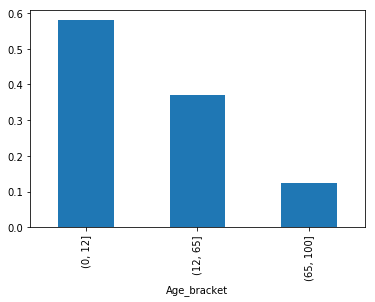

In [12]:
%matplotlib inline
by_age.plot(kind="bar")

In [13]:
#Q:Was it advantageous for survival to be a child? To be above 65?
#A:Children have the highest rate of survival while being over 65 is definately not advantageous for survival.

In [14]:
df['familySize'] = df['SibSp'] + df['Parch'] +1
no_family_df = df[(df['familySize'] == 1)]
with_family_df = df[(df['familySize'] != 1)]
with_family_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bracket,familySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,"(12, 65]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,"(12, 65]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,"(12, 65]",2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,"(0, 12]",5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,"(12, 65]",3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,"(12, 65]",2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,"(0, 12]",3
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S,"(12, 65]",7
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,"(0, 12]",6
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S,"(12, 65]",2


In [15]:
#Class

<function matplotlib.pyplot.show>

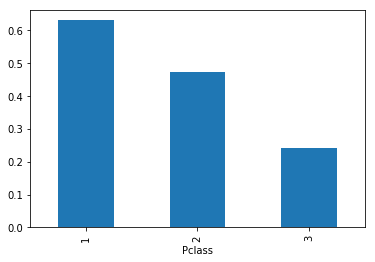

In [16]:
survived_by_pclass = df.groupby('Pclass')['Survived'].mean()
survived_by_pclass.plot(kind = 'bar')
plt.show

In [17]:
##The higher the class is, the higher the survival rate.

In [18]:
#Fare

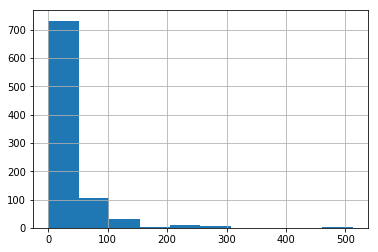

In [19]:
df['Fare'].hist()

In [20]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

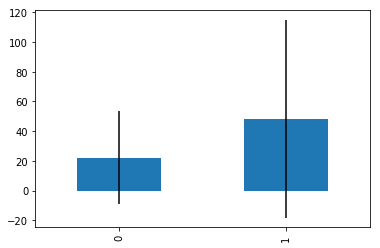

In [21]:
fare_dead = df["Fare"][df["Survived"] == 0]
fare_survived = df["Fare"][df["Survived"] == 1]

avgerage_fare = pd.DataFrame([fare_dead.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_dead.std(), fare_survived.std()])

avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

plt.show()

In [22]:
#The survival rate is ralated to fare since those who survived tended to have more expensive tickets.

Family Members

In [23]:
with_family_df.Survived.count()

354

In [24]:
with_family_df['Survived'].sum()

179

In [25]:
with_family_survived_num = with_family_df['Survived'].sum()
with_family_dead_num =  with_family_df.Survived.count()-with_family_df['Survived'].sum()

In [26]:
no_family_survived_num = no_family_df['Survived'].sum()
no_family_dead_num =  no_family_df.Survived.count()-with_family_df['Survived'].sum()

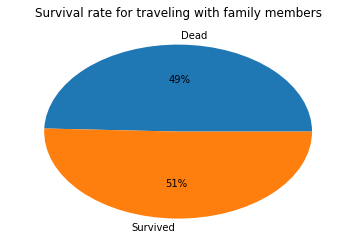

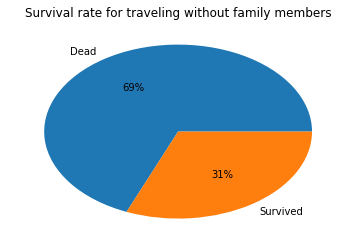

In [27]:
plt.pie([with_family_dead_num, with_family_survived_num],labels=['Dead','Survived'],autopct='%1.0f%%')
plt.title('Survival rate for traveling with family members') 
plt.show()
plt.pie([no_family_dead_num, no_family_survived_num],labels=['Dead','Survived'],autopct='%1.0f%%')
plt.title('Survival rate for traveling without family members') 
plt.show()

In [28]:
#Q:Was it advantageous for survival to have been traveling with family members on the Titanic?
#A:Yes, the survival rate is much higher for those traveled with family members.

Q:Can anything be learned  from the names of the passengers that is relevant for understanding survival?
A:Titles reflect social status and may predict survival probability.
Reference:https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

In [29]:
title = pd.DataFrame()
title[ 'Title' ] = df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [30]:
df['Title'] = df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bracket,familySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(12, 65]",2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(12, 65]",2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(12, 65]",1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(12, 65]",2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(12, 65]",1,Mr
5,6,0,3,"Moran, Mr. James",male,41.0,0,0,330877,8.4583,NaN,Q,"(12, 65]",1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(12, 65]",1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 12]",5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(12, 65]",3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(12, 65]",2,Mrs


In [32]:
df['Dr']=df['Title'].map({'Dr':1})
df['Master']=df['Title'].map({'Master':1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bracket,familySize,Title,Dr,Master
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(12, 65]",2,Mr,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(12, 65]",2,Mrs,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(12, 65]",1,Miss,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(12, 65]",2,Mrs,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(12, 65]",1,Mr,NaN,NaN
5,6,0,3,"Moran, Mr. James",male,41.0,0,0,330877,8.4583,NaN,Q,"(12, 65]",1,Mr,NaN,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(12, 65]",1,Mr,NaN,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0, 12]",5,Master,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(12, 65]",3,Mrs,NaN,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(12, 65]",2,Mrs,NaN,NaN


In [33]:
dr_df = df[(df['Dr'] == 1)]
dr_survived_num = dr_df['Survived'].sum()
dr_dead_num = dr_df.Survived.count()-dr_df['Survived'].sum()

In [34]:
master_df = df[(df['Master'] == 1)]
master_survived_num = master_df['Survived'].sum()
master_dead_num = master_df.Survived.count()-master_df['Survived'].sum()

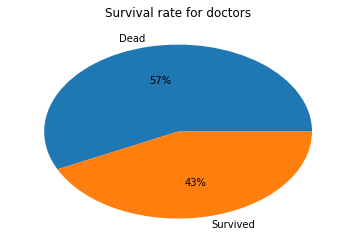

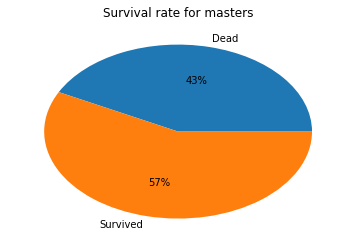

In [35]:
plt.pie([dr_dead_num, dr_survived_num],labels=['Dead','Survived'],autopct='%1.0f%%')
plt.title('Survival rate for doctors') 
plt.show()
plt.pie([master_dead_num, master_survived_num],labels=['Dead','Survived'],autopct='%1.0f%%')
plt.title('Survival rate for masters') 
plt.show()

In [36]:
#Those who have higher social status seemed have higher survival rates.